# SVM Algorithm

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Generating Datasets

In [2]:
from sklearn.datasets import make_classification

In [19]:
X,Y=make_classification(n_classes=2,n_samples=400,n_features=2,
                        n_informative=2,n_redundant=0,
                       n_clusters_per_class=1,random_state=3)

In [7]:
print(X.shape,Y.shape)

(400, 2) (400,)


In [21]:
print(X[:2,:])

[[ 0.61919256  0.8773346 ]
 [ 0.79245937 -1.0016892 ]]


In [22]:
print(Y[:5])

[0 1 0 1 0]


- Converting Zeroes to -1

In [23]:
Y[Y==0]=-1
print(Y[:5])

[-1  1 -1  1 -1]


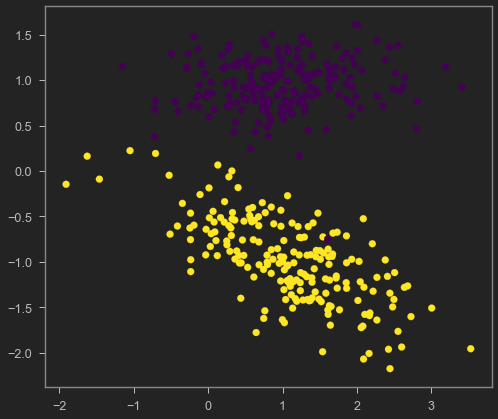

In [20]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

Formula:
- W = w - nw + 0            if t(i)>=1
      w - nw + ncy(i)x(i)   if t(i)<1

- b = b + 0       if t(i)>=1
      b + ncy(i)  if t(i)<1
      
- loss = min(1/2w^Tw)+c summation max(0,1-t(i))
                                t(i)=y(i)(w^Tx(i)+b)

In [83]:
class SVM:
    
    def __init__(self,c=1.0):
        
        self.c=c
        self.w=0
        self.b=0
        
    def hingeLoss(self,w,b,X,Y):
        
        loss=0.0
        
        loss+=0.5*np.dot(w,w.T)
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T)+b)
            loss+=self.c*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_itr=300):
        
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        n=learning_rate
        c=self.c
        
        w=np.zeros((1,no_of_features))
        b=0
        
        losses=[]
        
        for i in range(max_itr):
            
            l=self.hingeLoss(w,b,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                grad_w=0
                grad_b=0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti=Y[i]*(np.dot(w,X[i].T)+b)
                        
                        if ti>1:
                            grad_w+=0
                            grad_b+=0
                        else:
                            grad_w+=c*Y[i]*X[i]
                            grad_b+=c*Y[i]
                w = w - n*w + n*grad_w
                b = b + n*grad_b
                
        self.w=w
        self.b=b
        return w,b,losses
        

In [84]:
mysvm=SVM()
w,b,losses=mysvm.fit(X,Y)

In [85]:
print(len(losses),losses[-1])

300 14.507972295706356


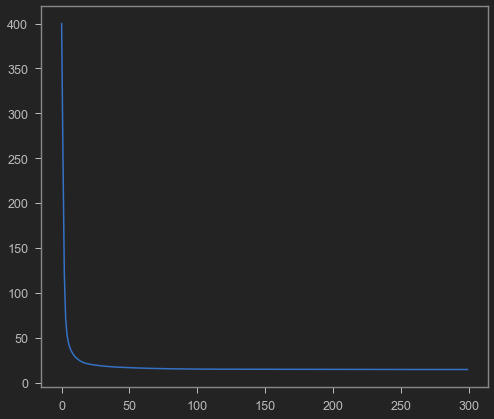

In [86]:
plt.plot(losses)

In [87]:
w,b=mysvm.w,mysvm.b
print(w,b)

[[-0.34699123 -2.09238891]] 0.42400000000000027


In [93]:
def plotHyperplane(w1,w2,b):
    fig,ax=plt.subplots(1,figsize=(10,10))
    x_1=np.linspace(-2,4,10)
    x_2=-(w1*x_1+b)/w2
    x_p=-(w1*x_1+b+1)/w2
    x_n=-(w1*x_1+b-1)/w2
    plt.plot(x_1,x_2,label='hyperplane')
    plt.plot(x_1,x_p,linestyle='dashed',label='positive plane')
    plt.plot(x_1,x_n,linestyle='dashed',label='negative plane')
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()

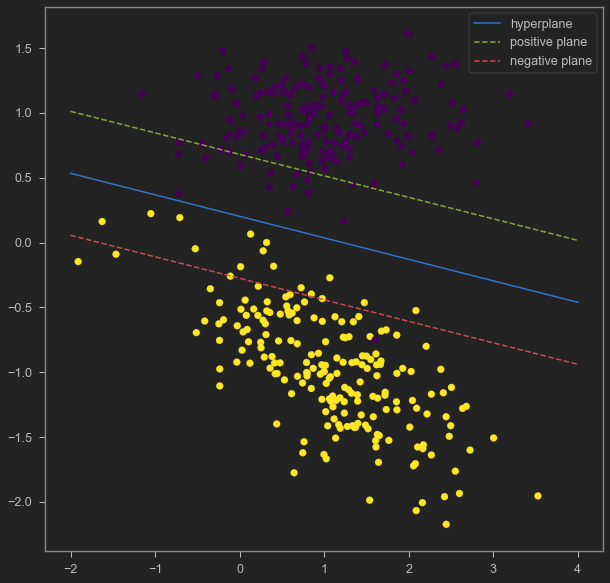

In [94]:
plotHyperplane(w[0,0],w[0,1],b)

### Effect of penality constant c

In [95]:
mysvm=SVM(c=1000)
w,b,losses=mysvm.fit(X,Y)

In [96]:
w,b=mysvm.w,mysvm.b
print(w,b)

[[-14.22766456 -44.2194566 ]] 5.0


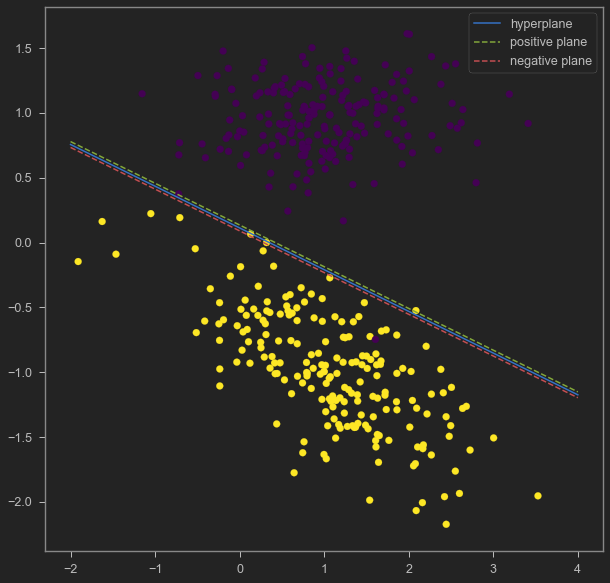

In [97]:
plotHyperplane(w[0,0],w[0,1],b)